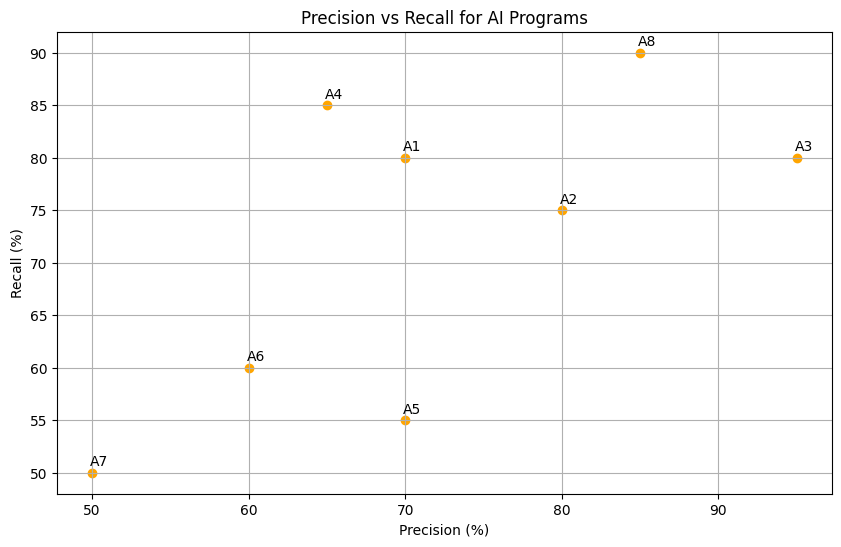

In [2]:
import matplotlib.pyplot as plt

# Data from the table
programs = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
precision = [70, 80, 95, 65, 70, 60, 50, 85]
recall = [80, 75, 80, 85, 55, 60, 50, 90]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(precision, recall, color='Orange')

# Annotate each point with the program name
for i, program in enumerate(programs):
    plt.annotate(program, (precision[i], recall[i]), textcoords="offset points", xytext=(5,5), ha='center')

# Add titles and labels
plt.title('Precision vs Recall for AI Programs')
plt.xlabel('Precision (%)')
plt.ylabel('Recall (%)')
plt.grid(True)

# Show the plot
plt.show()


We consider the relation ⪯_a on NxN defined by:

 - (a,b) ⪯_a  (a',b')  ⟺  (a ≤ a') ∧ (b ≤ b')

Edges (Program Comparisons):
A -> B
A -> B
A -> B
A -> B
A -> B
A -> B
A -> C
B -> D
C -> D
C -> D
C -> E
C -> E
D -> E
D -> E
E -> F
F -> G
F -> H
G -> H


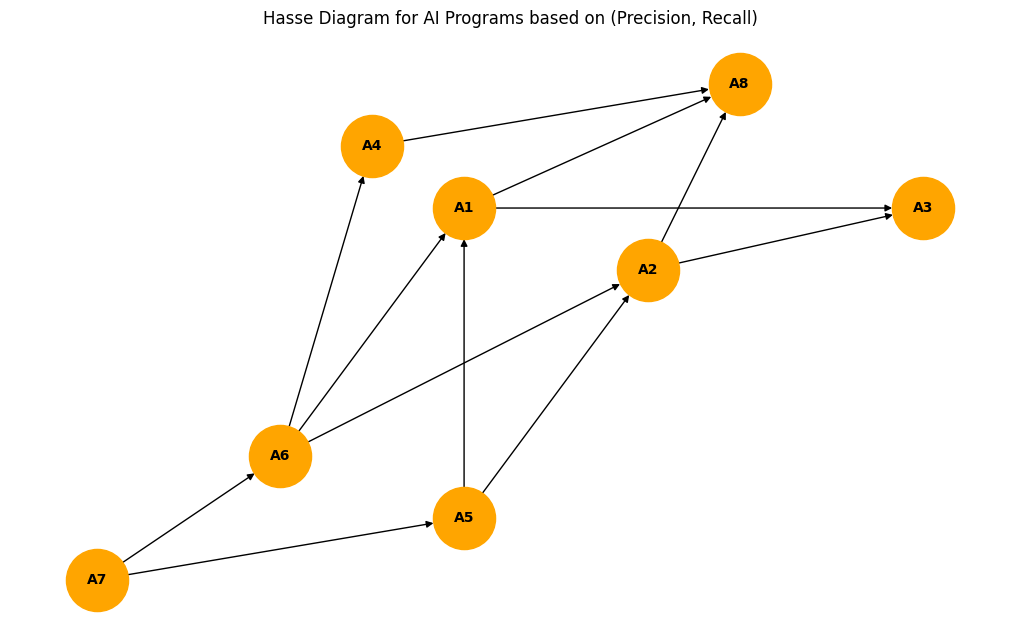

In [49]:
import matplotlib.pyplot as plt
import networkx as nx

# Data points
programs = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
models = [ (70,80), (80,75), (95,80), (65,85), (70,55), (60,60), (50,50), (85,90) ]

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions
for i, program in enumerate(programs):
    G.add_node(program, pos=models[i])

# Add edges based on the partial order
for i in range(len(models)):
    for j in range(len(models)):
        if i != j and models[i][0] <= models[j][0] and models[i][1] <= models[j][1]:
            G.add_edge(programs[i], programs[j])

print("Edges (Program Comparisons):")
for edge in edges:
    print(f"{edge[0]} -> {edge[1]}")

# Remove transitive edges
H = nx.transitive_reduction(G)

# Get positions for the nodes
pos = {programs[i]: models[i] for i in range(len(programs))}

# Draw the Hasse diagram
plt.figure(figsize=(10, 6))
nx.draw(H, pos, with_labels=True, node_size=2000, node_color="orange", font_size=10, font_weight='bold', arrows=True)
plt.title('Hasse Diagram for AI Programs based on (Precision, Recall)')
plt.xlabel('Precision (%)')
plt.ylabel('Recall (%)')
plt.show()


# Part2
 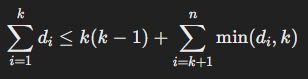

In [7]:
def is_graphical_erdos_gallai(degree_sequence):
    # Sort the degree sequence in non-increasing order
    degree_sequence.sort(reverse=True)
    n = len(degree_sequence)
    # Check if the sum of the degree sequence is even
    if sum(degree_sequence) % 2 != 0:
        return False

    # Apply the Erdős-Gallai condition
    for k in range(1, n + 1):
        left_side = sum(degree_sequence[:k])
        right_side = k * (k - 1) + sum(min(d, k) for d in degree_sequence[k:])
        if left_side > right_side:
            return False

    return True

# Test the function with the given degree sequence
degree_sequence = [7, 7, 5, 5, 5, 3, 2, 2]
is_graphical = is_graphical_erdos_gallai(degree_sequence)
print(f"The degree sequence {degree_sequence} is graphical: {is_graphical}")


The degree sequence [7, 7, 5, 5, 5, 3, 2, 2] is graphical: False


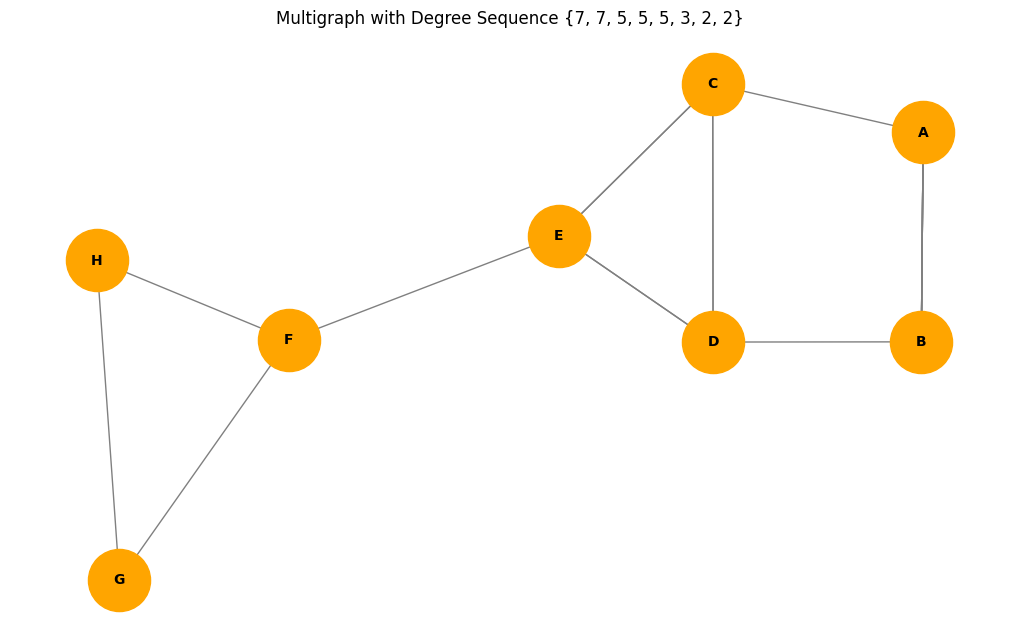

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new multigraph
G = nx.MultiGraph()

# Define the nodes and their degrees
nodes = {
    'A': 7,
    'B': 7,
    'C': 5,
    'D': 5,
    'E': 5,
    'F': 3,
    'G': 2,
    'H': 2
}

# Add nodes to the graph
G.add_nodes_from(nodes.keys())

# Manually add edges to meet the degree requirements
edges = [
    ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'),  # 6 edges between A and B
    ('A', 'C'),  # 1 edge between A and C
    ('B', 'D'),  # 1 edge between B and D
    ('C', 'D'), ('C', 'D'),  # 2 edges between C and D
    ('C', 'E'), ('C', 'E'),  # 2 edges between C and E
    ('D', 'E'), ('D', 'E'),  # 2 edges between D and E
    ('E', 'F'),  # 1 edge between E and F
    ('F', 'G'),  # 1 edge between F and G
    ('F', 'H'),  # 1 edge between F and H
    ('G', 'H')   # 1 edge between G and H
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="orange", font_size=10, font_weight='bold', edge_color='gray')
plt.title('Multigraph with Degree Sequence {7, 7, 5, 5, 5, 3, 2, 2}')
plt.show()


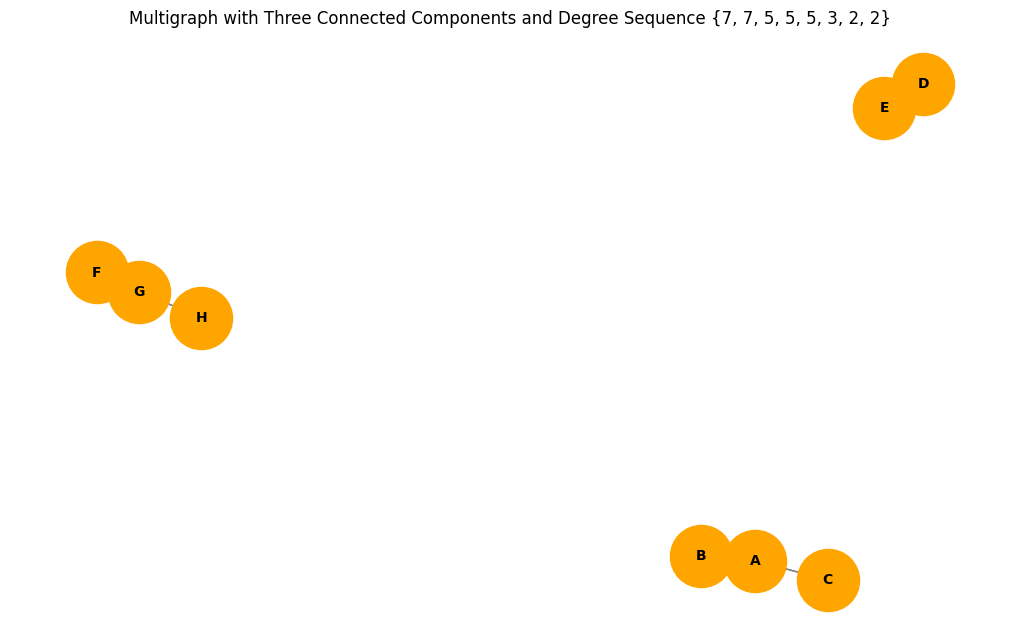

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new multigraph
G = nx.MultiGraph()

# Define the nodes and their degrees for three components
nodes_group1 = {
    'A': 7,
    'B': 5,
    'C': 2
}

nodes_group2 = {
    'D': 7,
    'E': 3
}

nodes_group3 = {
    'F': 5,
    'G': 5,
    'H': 2
}

# Add nodes to the graph
G.add_nodes_from(nodes_group1.keys())
G.add_nodes_from(nodes_group2.keys())
G.add_nodes_from(nodes_group3.keys())

# Add edges for Group 1
edges_group1 = [
    ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'),  # 5 edges between A and B
    ('A', 'C'), ('A', 'C')  # 2 edges between A and C
]

# Add edges for Group 2
edges_group2 = [
    ('D', 'E'), ('D', 'E'), ('D', 'E')  # 3 edges between D and E
]

# Add edges for Group 3
edges_group3 = [
    ('F', 'G'), ('F', 'G'), ('F', 'G'), ('F', 'G'), ('F', 'G'),  # 5 edges between F and G
    ('G', 'H'), ('G', 'H')  # 2 edges between G and H
]

# Add edges to the graph
G.add_edges_from(edges_group1)
G.add_edges_from(edges_group2)
G.add_edges_from(edges_group3)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="orange", font_size=10, font_weight='bold', edge_color='gray')
plt.title('Multigraph with Three Connected Components and Degree Sequence {7, 7, 5, 5, 5, 3, 2, 2}')
plt.show()


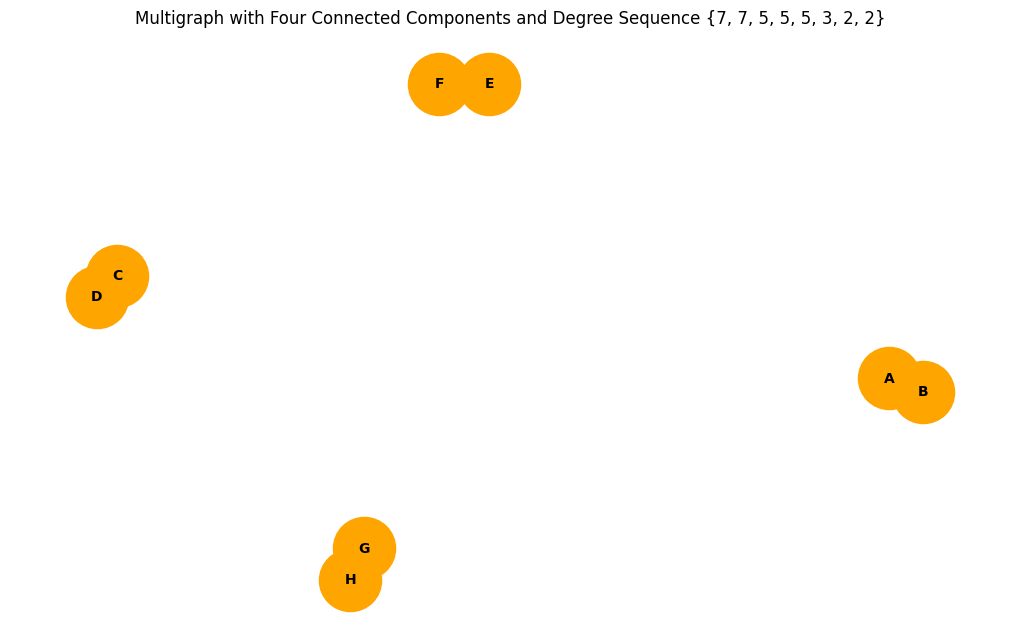

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new multigraph
G = nx.MultiGraph()

# Define the nodes and their degrees for four components
nodes_group1 = {
    'A': 7,
    'B': 5
}

nodes_group2 = {
    'C': 7,
    'D': 5
}

nodes_group3 = {
    'E': 5,
    'F': 3
}

nodes_group4 = {
    'G': 2,
    'H': 2
}

# Add nodes to the graph
G.add_nodes_from(nodes_group1.keys())
G.add_nodes_from(nodes_group2.keys())
G.add_nodes_from(nodes_group3.keys())
G.add_nodes_from(nodes_group4.keys())

# Add edges for Group 1
edges_group1 = [
    ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B')  # 5 edges between A and B
]

# Add edges for Group 2
edges_group2 = [
    ('C', 'D'), ('C', 'D'), ('C', 'D'), ('C', 'D'), ('C', 'D')  # 5 edges between C and D
]

# Add edges for Group 3
edges_group3 = [
    ('E', 'F'), ('E', 'F'), ('E', 'F')  # 3 edges between E and F
]

# Add edges for Group 4
edges_group4 = [
    ('G', 'H'), ('G', 'H')  # 2 edges between G and H
]

# Add edges to the graph
G.add_edges_from(edges_group1)
G.add_edges_from(edges_group2)
G.add_edges_from(edges_group3)
G.add_edges_from(edges_group4)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="orange", font_size=10, font_weight='bold', edge_color='gray')
plt.title('Multigraph with Four Connected Components and Degree Sequence {7, 7, 5, 5, 5, 3, 2, 2}')
plt.show()


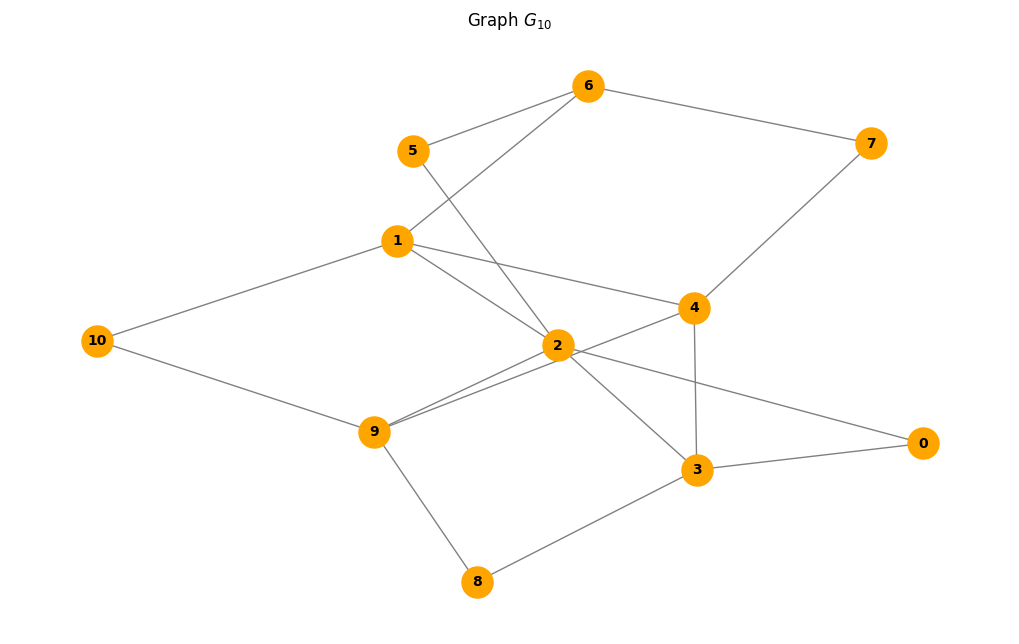

The graph G_10 is connected: True


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add vertices
vertices = list(range(11))
G.add_nodes_from(vertices)

# Add edges based on prime sum conditions
edges = [
    (0, 2), (0, 3), (1, 2), (1, 4), (1, 6), (1, 10), 
    (2, 3), (2, 5), (2, 9), (3, 4), (3, 8), 
    (4, 7), (4, 9), (5, 6), (6, 7), (8, 9), (9, 10)
]

G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="orange", font_size=10, font_weight='bold', edge_color='gray')
plt.title('Graph $G_{10}$')
plt.show()

# Check if the graph is connected
is_connected = nx.is_connected(G)
print(f"The graph G_10 is connected: {is_connected}")


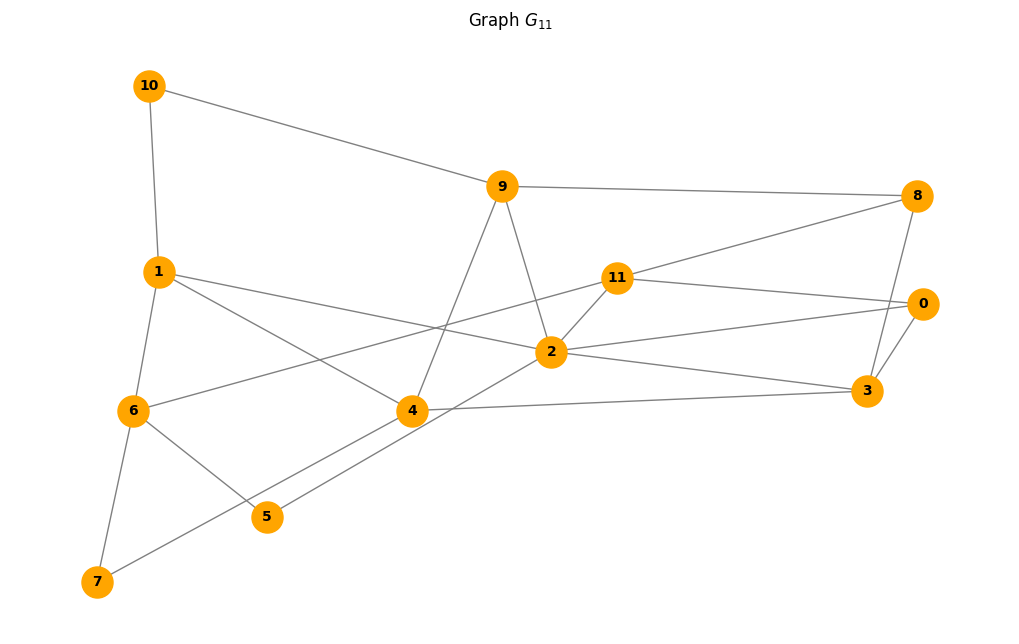

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add vertices
vertices = list(range(12))
G.add_nodes_from(vertices)

# Add edges based on prime sum conditions for G10
edges_G10 = [
    (0, 2), (0, 3), (1, 2), (1, 4), (1, 6), (1, 10), 
    (2, 3), (2, 5), (2, 9), (3, 4), (3, 8), 
    (4, 7), (4, 9), (5, 6), (6, 7), (8, 9), (9, 10)
]

# Add edges involving vertex 11
edges_G11 = [
    (0, 11), (2, 11), (6, 11), (8, 11)
]

# Combine edges
edges = edges_G10 + edges_G11

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="orange", font_size=10, font_weight='bold', edge_color='gray')
plt.title('Graph $G_{11}$')
plt.show()
